In [191]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
matplotlib.rcParams['figure.figsize']=(20,10)

In [192]:
df0=pd.read_csv('dataset.csv', low_memory=False)
df0

,Unnamed: 0,locality_name,price,area,house_type,total_beds
0,0,Tarwala Nagar,8499000,2260,house,4
1,1,Dombivali,6790000,500,house,2
2,2,Wagholi,6030000,773,house,3
3,3,Ambegaon Budruk,3537000,477,house,1
4,4,Dombivali,9500000,917,house,3
...,...,...,...,...,...,...
105586,191269,Pirangut,8060000,947,house,3
105587,191270,Pirangut,4000000,448,house,1
105588,191271,Pirangut,16800000,1887,Independent House,4
105589,191272,Pirangut,7500000,768,house,3


In [193]:
df0=df0.drop(['Unnamed: 0'],axis='columns')
df0

,locality_name,price,area,house_type,total_beds
0,Tarwala Nagar,8499000,2260,house,4
1,Dombivali,6790000,500,house,2
2,Wagholi,6030000,773,house,3
3,Ambegaon Budruk,3537000,477,house,1
4,Dombivali,9500000,917,house,3
...,...,...,...,...,...
105586,Pirangut,8060000,947,house,3
105587,Pirangut,4000000,448,house,1
105588,Pirangut,16800000,1887,Independent House,4
105589,Pirangut,7500000,768,house,3


In [194]:
df0.shape

(105591, 5)

In [195]:
df0.groupby('house_type')['house_type'].agg('count')

house_type
Independent Floor       175
Independent House       395
Penthouse                 3
Studio Apartment       1288
Villa                   764
house                102966
Name: house_type, dtype: int64

In [196]:
df0.drop(df0[(df0['house_type']=='Independent Floor')].index,axis=0, inplace=True)
df0.groupby('house_type')['house_type'].agg('count')

house_type
Independent House       395
Penthouse                 3
Studio Apartment       1288
Villa                   764
house                102966
Name: house_type, dtype: int64

In [197]:
df0.drop(df0[(df0['house_type']=='Independent House')].index,axis=0, inplace=True)
df0.groupby('house_type')['house_type'].agg('count')

house_type
Penthouse                3
Studio Apartment      1288
Villa                  764
house               102966
Name: house_type, dtype: int64

In [198]:
df0.drop(df0[(df0['house_type']=='Penthouse')].index,axis=0, inplace=True)
df0.groupby('house_type')['house_type'].agg('count')

house_type
Studio Apartment      1288
Villa                  764
house               102966
Name: house_type, dtype: int64

In [199]:
df0.drop(df0[(df0['house_type']=='Studio Apartment')].index,axis=0, inplace=True)
df0.groupby('house_type')['house_type'].agg('count')

house_type
Villa       764
house    102966
Name: house_type, dtype: int64

In [200]:
df0.drop(df0[(df0['house_type']=='Villa')].index,axis=0, inplace=True)
df0.groupby('house_type')['house_type'].agg('count')

house_type
house    102966
Name: house_type, dtype: int64

In [201]:
df0.isnull().sum()

locality_name    0
price            0
area             0
house_type       0
total_beds       0
dtype: int64

In [202]:
df0

,locality_name,price,area,house_type,total_beds
0,Tarwala Nagar,8499000,2260,house,4
1,Dombivali,6790000,500,house,2
2,Wagholi,6030000,773,house,3
3,Ambegaon Budruk,3537000,477,house,1
4,Dombivali,9500000,917,house,3
...,...,...,...,...,...
105584,Pirangut,7033000,695,house,2
105586,Pirangut,8060000,947,house,3
105587,Pirangut,4000000,448,house,1
105589,Pirangut,7500000,768,house,3


In [203]:
new=df0

In [204]:
new=new.drop(new[(new['total_beds']>4)].index,axis=0)
new

,locality_name,price,area,house_type,total_beds
0,Tarwala Nagar,8499000,2260,house,4
1,Dombivali,6790000,500,house,2
2,Wagholi,6030000,773,house,3
3,Ambegaon Budruk,3537000,477,house,1
4,Dombivali,9500000,917,house,3
...,...,...,...,...,...
105584,Pirangut,7033000,695,house,2
105586,Pirangut,8060000,947,house,3
105587,Pirangut,4000000,448,house,1
105589,Pirangut,7500000,768,house,3


In [205]:
#new=new.drop(['Unnamed: 0','Unnamed: 11'],axis='columns')
new

,locality_name,price,area,house_type,total_beds
0,Tarwala Nagar,8499000,2260,house,4
1,Dombivali,6790000,500,house,2
2,Wagholi,6030000,773,house,3
3,Ambegaon Budruk,3537000,477,house,1
4,Dombivali,9500000,917,house,3
...,...,...,...,...,...
105584,Pirangut,7033000,695,house,2
105586,Pirangut,8060000,947,house,3
105587,Pirangut,4000000,448,house,1
105589,Pirangut,7500000,768,house,3


In [206]:
new

,locality_name,price,area,house_type,total_beds
0,Tarwala Nagar,8499000,2260,house,4
1,Dombivali,6790000,500,house,2
2,Wagholi,6030000,773,house,3
3,Ambegaon Budruk,3537000,477,house,1
4,Dombivali,9500000,917,house,3
...,...,...,...,...,...
105584,Pirangut,7033000,695,house,2
105586,Pirangut,8060000,947,house,3
105587,Pirangut,4000000,448,house,1
105589,Pirangut,7500000,768,house,3


In [207]:
#####################################################################################################################################

In [208]:
#data analysis

In [209]:
print(new)

          locality_name    price  area house_type  total_beds
0         Tarwala Nagar  8499000  2260      house           4
1             Dombivali  6790000   500      house           2
2               Wagholi  6030000   773      house           3
3       Ambegaon Budruk  3537000   477      house           1
4             Dombivali  9500000   917      house           3
...                 ...      ...   ...        ...         ...
105584         Pirangut  7033000   695      house           2
105586         Pirangut  8060000   947      house           3
105587         Pirangut  4000000   448      house           1
105589         Pirangut  7500000   768      house           3
105590         Pirangut  6583000   689      house           2

[102966 rows x 5 columns]


In [210]:
new.shape

(102966, 5)

In [211]:
#(Exploratory Data Analysis - EDA)

In [212]:
new.describe() 

,price,area,total_beds
count,1.029660e+05,102966.000000,102966.000000
mean,1.153483e+07,902.588670,1.997630
std,1.408539e+07,460.816622,0.781937
min,3.000000e+05,127.000000,1.000000
25%,5.200000e+06,617.000000,1.000000
50%,7.650000e+06,792.000000,2.000000
75%,1.260000e+07,1056.000000,2.000000
max,3.604000e+08,6900.000000,4.000000


In [213]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102966 entries, 0 to 105590
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   locality_name  102966 non-null  object
 1   price          102966 non-null  int64 
 2   area           102966 non-null  int64 
 3   house_type     102966 non-null  object
 4   total_beds     102966 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [214]:
# Data Cleaning

In [215]:
null_counts = new.isnull().sum()
print(null_counts)

locality_name    0
price            0
area             0
house_type       0
total_beds       0
dtype: int64


In [216]:
 #Exploratory Data Analysis (EDA)

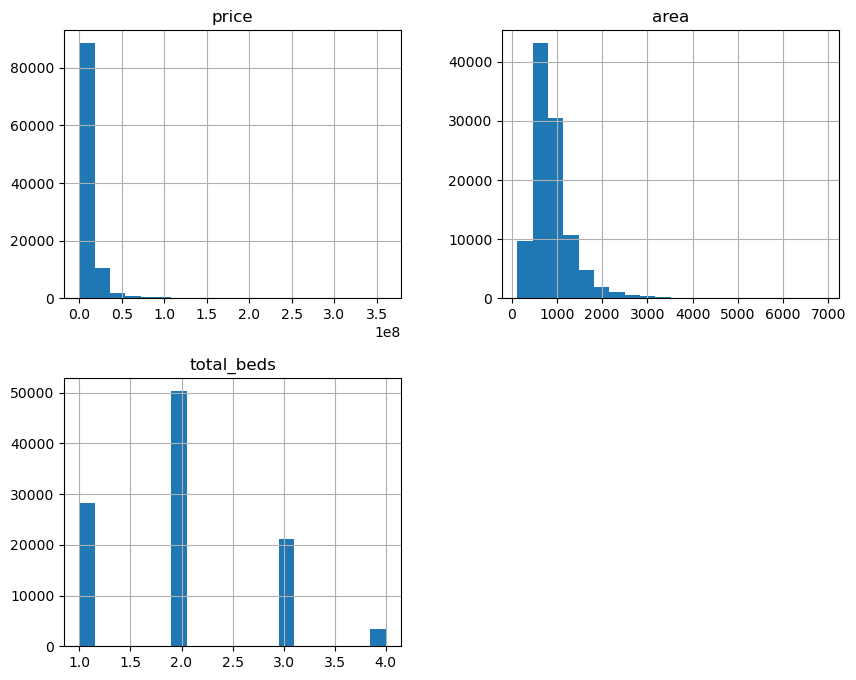

In [217]:
new.hist(figsize=(10, 8), bins=20)
plt.show()

In [218]:
unique_strings = new['locality_name'].unique()
string_to_int = {string: i for i, string in enumerate(unique_strings)}
new['locality_id'] = new['locality_name'].map(string_to_int)
print(new)

          locality_name    price  area house_type  total_beds  locality_id
0         Tarwala Nagar  8499000  2260      house           4            0
1             Dombivali  6790000   500      house           2            1
2               Wagholi  6030000   773      house           3            2
3       Ambegaon Budruk  3537000   477      house           1            3
4             Dombivali  9500000   917      house           3            1
...                 ...      ...   ...        ...         ...          ...
105584         Pirangut  7033000   695      house           2           36
105586         Pirangut  8060000   947      house           3           36
105587         Pirangut  4000000   448      house           1           36
105589         Pirangut  7500000   768      house           3           36
105590         Pirangut  6583000   689      house           2           36

[102966 rows x 6 columns]


<Axes: >

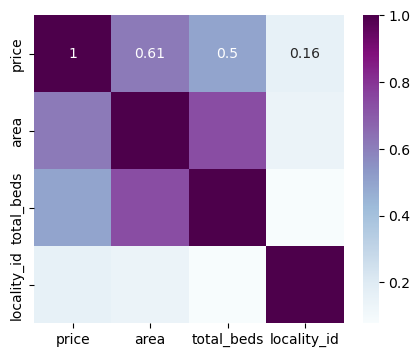

In [219]:
selected_columns = new[['price', 'area', 'total_beds','locality_id']]
import seaborn as sns
import matplotlib.pyplot as plt

corr = selected_columns.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr,annot = True, cmap = 'BuPu')



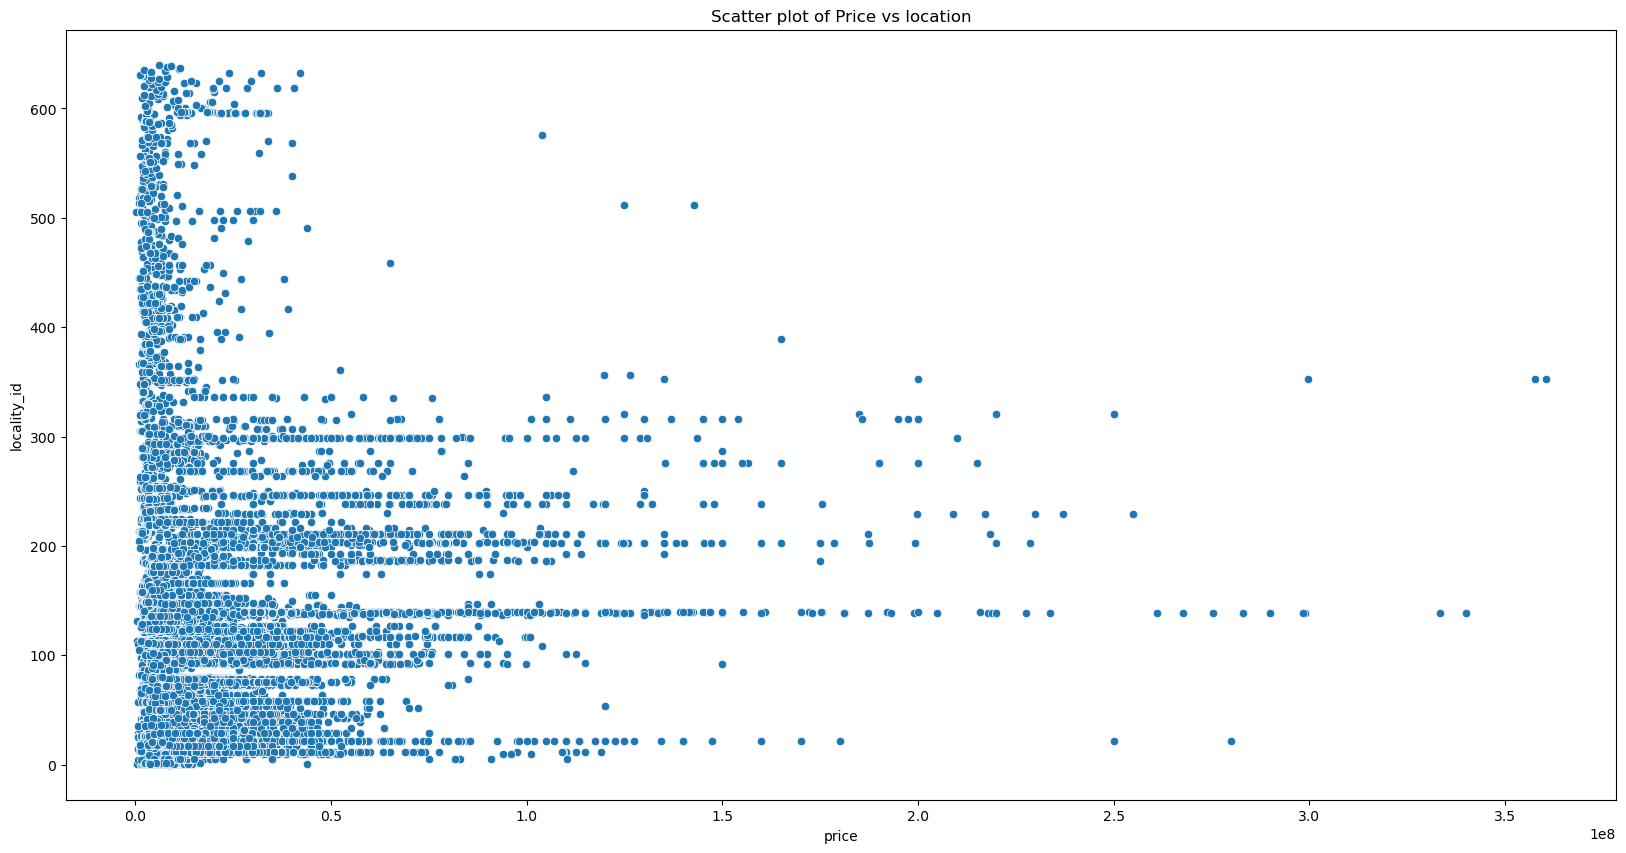

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='price', y='locality_id', data=new)
plt.title('Scatter plot of Price vs location')
plt.show()


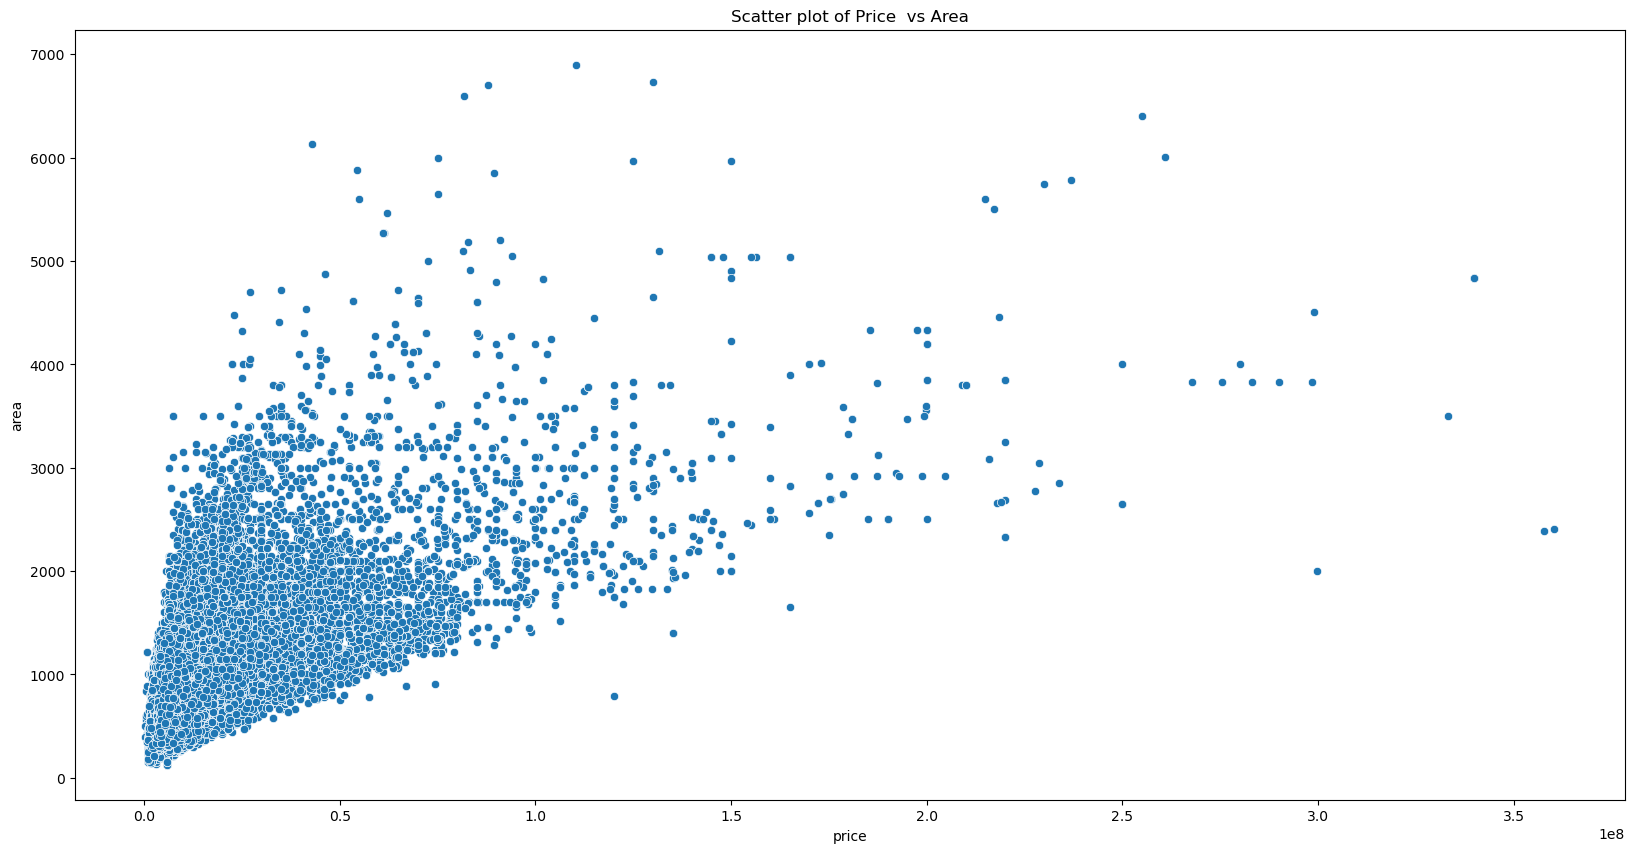

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='price', y='area', data=new)
plt.title('Scatter plot of Price  vs Area')
plt.show()

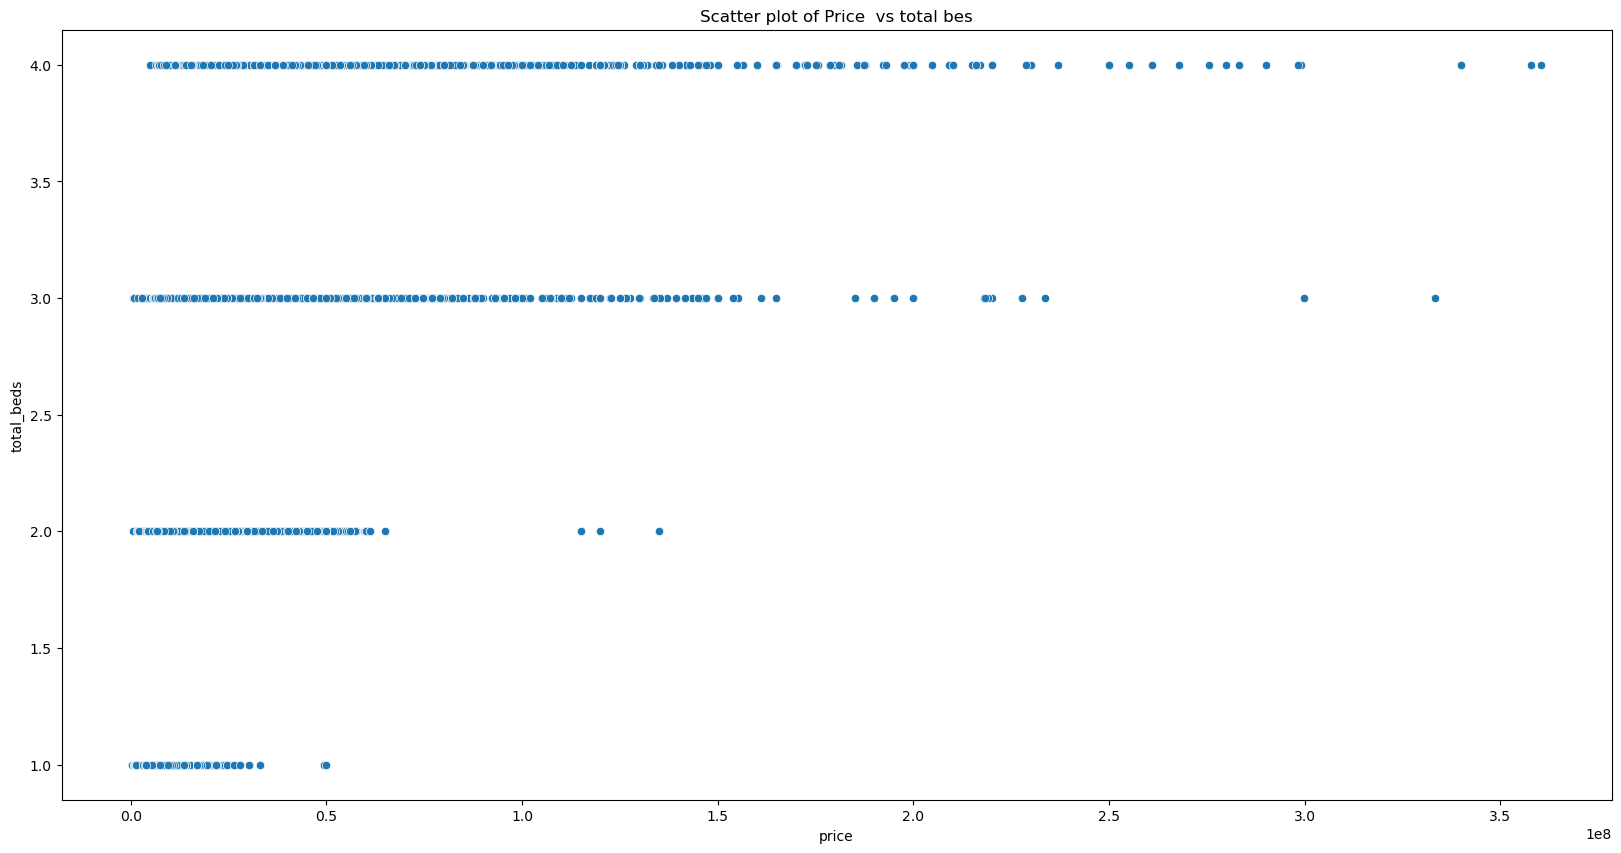

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='price', y='total_beds', data=new)
plt.title('Scatter plot of Price  vs total bedss')
plt.show()

In [223]:
new.groupby('locality_name')['locality_name'].agg('count')

locality_name
Aamrai                            1
Adaigaon                          7
Additional M.I.D.C                4
Adgaon                            4
Adharwadi                         5
                                 ..
thakur village kandivali east     1
ulhasnagar 4                      4
vasant vihar thane west          50
versova                          42
vile parle west                  16
Name: locality_name, Length: 641, dtype: int64

In [224]:
dummies2=pd.get_dummies(new.locality_name)


In [225]:
new=pd.concat([new,dummies2],axis='columns')


In [226]:
new=new.drop(['locality_name'],axis='columns')



In [227]:
##########################################################################

In [228]:

print(new)

          price  area house_type  total_beds  locality_id  Aamrai  Adaigaon  \
0       8499000  2260      house           4            0   False     False   
1       6790000   500      house           2            1   False     False   
2       6030000   773      house           3            2   False     False   
3       3537000   477      house           1            3   False     False   
4       9500000   917      house           3            1   False     False   
...         ...   ...        ...         ...          ...     ...       ...   
105584  7033000   695      house           2           36   False     False   
105586  8060000   947      house           3           36   False     False   
105587  4000000   448      house           1           36   False     False   
105589  7500000   768      house           3           36   False     False   
105590  6583000   689      house           2           36   False     False   

        Additional M.I.D.C  Adgaon  Adharwadi  ... 

In [229]:
x = new.drop(['price','house_type'],axis='columns')


In [230]:
y=new.price


# TRAINING MODEL

In [231]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [232]:
#linear regression

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

R-squared: -542112550809.348
Mean Absolute Error: 304820853722.4198


In [234]:
#decision tre


In [235]:

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.9026971403411403
Mean Absolute Error: 1219978.3176382743


In [236]:
#lasso

In [237]:
from sklearn import linear_model
lasso_clf=linear_model.Lasso()
lasso_clf.fit(x_train,y_train)
y_pred = lasso_clf.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.7807600353622494
Mean Absolute Error: 3365915.5809538146


In [238]:
def predict_dt(location, sqft, beds):
    try:
        if location not in x.columns:
            print("Location not found in the model. Please try another location.")
        loc_index = np.where(x.columns == location)[0][0]
        X = np.zeros(len(x.columns))
        X[0] = sqft
        X[1] = beds
        if loc_index >= 0:
            X[loc_index] = 1
        return dt.predict([X])[0]
    except IndexError as e:
        return 0

In [239]:
import warnings
Location =input("Enter the location : ")
Size=int(input("Enter the size of house in sqft :  "))
Bed=int(input("Enter the number of bedrooms : "))
s=predict_dt(Location,Size,Bed)
print(f"Predicted Price is [ {s} rs] ")
warnings.filterwarnings('ignore', category=UserWarning)

Enter the location :  j
Enter the size of house in sqft :   l


ValueError: invalid literal for int() with base 10: 'l'

In [ ]:
locality_name	price     area	total_beds
Bhugaon	        860000	  1051	  3	
Chembur    	    3050000  984	  3	
Kharadi	        670000	  838	  2
Lohegaon	    423700	  916	  2
Andheri East    920000	  684	  1
Kurla	        990000    831	  2
Bandra East	    2790000   1173	  2
Mira Road East	560000   349	  1
Dombivali	    604900	  572	  2
Mira Road East	879900	  981	  2

In [ ]:
#thank You

# 